# Unit 2 - Perceptron Implementation 

---


Universidad Politécnica de Yucatán


Robotics 9B


Marco Alejandro González Barbudo


## I.	Perceptron Algorithm

A perceptron is a fundamental building block of Artificial Neural Networks (ANNs). It is a type of simple neural network unit that takes multiple input values, calculates a weighted sum of these inputs, and produces an output based on a threshold. In more technical terms, a perceptron computes a linear combination of its inputs and applies an activation function to determine its output.

**How Perceptron Algorithms Work:**

Perceptron algorithms, particularly the perceptron learning rule and the delta rule, are used to train perceptrons. Here's a simplified explanation of how they work:

1. Initialization: Initialize the weights and biases (thresholds) associated with the perceptron to small random values or zeros.

2. Input and Weighted Sum: For each input, multiply it by its corresponding weight. Sum up these weighted inputs. Add the bias term.

3. Activation Function: Apply an activation function to the weighted sum plus bias. 

4. Error Calculation: Compare the actual output with the desired or target output. Calculate the error, which is the difference between the target and actual output.

5. Weight Update: Adjust the weights and bias using a learning algorithm, such as the perceptron rule or delta rule. The goal is to reduce the error in subsequent iterations.

6. Iterate: Repeat steps 2-5 for a number of iterations or until the error converges to an acceptable level.

**Limitations:**

Linear Separability: Perceptrons can only model linearly separable functions. They struggle with more complex problems that require non-linear decision boundaries.

**Advantages:**

Simplicity: Perceptrons are simple and computationally efficient.
Interpretability: Their decision-making process is relatively easy to understand.
Disadvantages:

Limited Expressiveness: They cannot represent complex, non-linear functions.
Convergence Issues: Perceptrons may not converge if the data is not linearly separable.
Single-Layer: Perceptrons are single-layer networks, limiting their capability compared to multilayer networks like feedforward neural networks.

**Applications:**

Perceptrons are used in binary classification tasks where the decision boundary is linearly separable.
They have historical significance in the development of neural networks, even though they are rarely used in modern deep learning due to their limitations.

## II.	Algorithm Pseudocode

START

&nbsp; &nbsp;Initialize weights $w$ and bias $b$ to small random values or zeros
    
&nbsp; &nbsp;Initialize the learning rate $η$
    
&nbsp; &nbsp;INPUT: Dataset $D = {(X_1, y_1), (X_2, y_2), ..., (X_N, y_N)}$
    
&nbsp; &nbsp;FOR each training epoch (repeat until convergence or a set number of epochs):
    
&nbsp; &nbsp; &nbsp; FOR each training example $(X_i, y_i)$ in $D$:
        
&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;Compute the weighted sum $z = X_i • w + b$

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;Apply the activation function to z: $o_i = sign(z)$
            
&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;Calculate the error: $error = y_i - o_i$
            
&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;Update weights and bias:
           
&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;$w = w + η * error * X_i$

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;$b = b + η * error$
            
&nbsp; &nbsp; &nbsp;END (for each training example)
    
&nbsp;&nbsp;END (for each epoch)
    
&nbsp;&nbsp;OUTPUT: Trained weights $w$ and bias $b$
    
END


## III. Algorithm Implementation


### Dataset Description

This dataset is a collection of basic health biological signal data. The goal is to determine the presence or absence of smoking through bio-signals.

In [1]:
# Notebook Initialization
import numpy as np
import pandas as pd

# Loading Dataset
df = pd.read_csv("C:/Users/marco/Documents/Machine_Learning/Dataset/smoking.csv")
df

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,55676,F,40,170,65,75.0,0.9,0.9,1.0,1.0,...,12.3,1.0,0.6,14.0,7.0,10.0,Y,1,Y,0
55688,55681,F,45,160,50,70.0,1.2,1.2,1.0,1.0,...,14.0,1.0,0.9,20.0,12.0,14.0,Y,0,Y,0
55689,55683,F,55,160,50,68.5,1.0,1.2,1.0,1.0,...,12.4,1.0,0.5,17.0,11.0,12.0,Y,0,N,0
55690,55684,M,60,165,60,78.0,0.8,1.0,1.0,1.0,...,14.4,1.0,0.7,20.0,19.0,18.0,Y,0,N,0


In [2]:
# Preparing Dataset

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder for 'gender', oral', and 'tartar'
df['gender'] = LabelEncoder().fit_transform(df['gender'])
df['oral'] = LabelEncoder().fit_transform(df['oral'])
df['tartar'] = LabelEncoder().fit_transform(df['tartar'])

# Delate ID Feature
df = df.drop(columns=['ID'])
df

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,12.9,1.0,0.7,18.0,19.0,27.0,0,0,1,0
1,0,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,12.7,1.0,0.6,22.0,19.0,18.0,0,0,1,0
2,1,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,15.8,1.0,1.0,21.0,16.0,22.0,0,0,0,1
3,1,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,14.7,1.0,1.0,19.0,26.0,18.0,0,0,1,0
4,0,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,12.5,1.0,0.6,16.0,14.0,22.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,0,40,170,65,75.0,0.9,0.9,1.0,1.0,110.0,...,12.3,1.0,0.6,14.0,7.0,10.0,0,1,1,0
55688,0,45,160,50,70.0,1.2,1.2,1.0,1.0,101.0,...,14.0,1.0,0.9,20.0,12.0,14.0,0,0,1,0
55689,0,55,160,50,68.5,1.0,1.2,1.0,1.0,117.0,...,12.4,1.0,0.5,17.0,11.0,12.0,0,0,0,0
55690,1,60,165,60,78.0,0.8,1.0,1.0,1.0,133.0,...,14.4,1.0,0.7,20.0,19.0,18.0,0,0,0,0


In [3]:
# Features
x = df.drop(columns=['smoking'])[:-1]
x

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar
0,0,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,0,1
1,0,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,0,1
2,1,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,0,0
3,1,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0,0,1
4,0,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55686,0,60,150,50,75.0,1.0,1.2,1.0,1.0,102.0,...,116.0,12.6,1.0,0.8,26.0,21.0,14.0,0,0,1
55687,0,40,170,65,75.0,0.9,0.9,1.0,1.0,110.0,...,118.0,12.3,1.0,0.6,14.0,7.0,10.0,0,1,1
55688,0,45,160,50,70.0,1.2,1.2,1.0,1.0,101.0,...,79.0,14.0,1.0,0.9,20.0,12.0,14.0,0,0,1
55689,0,55,160,50,68.5,1.0,1.2,1.0,1.0,117.0,...,63.0,12.4,1.0,0.5,17.0,11.0,12.0,0,0,0


In [4]:
# Target Variables
y = df['smoking'][:-1]
y

0        0
1        0
2        1
3        0
4        0
        ..
55686    0
55687    0
55688    0
55689    0
55690    0
Name: smoking, Length: 55691, dtype: int64

Accurancy after 100 epochs: 0.69


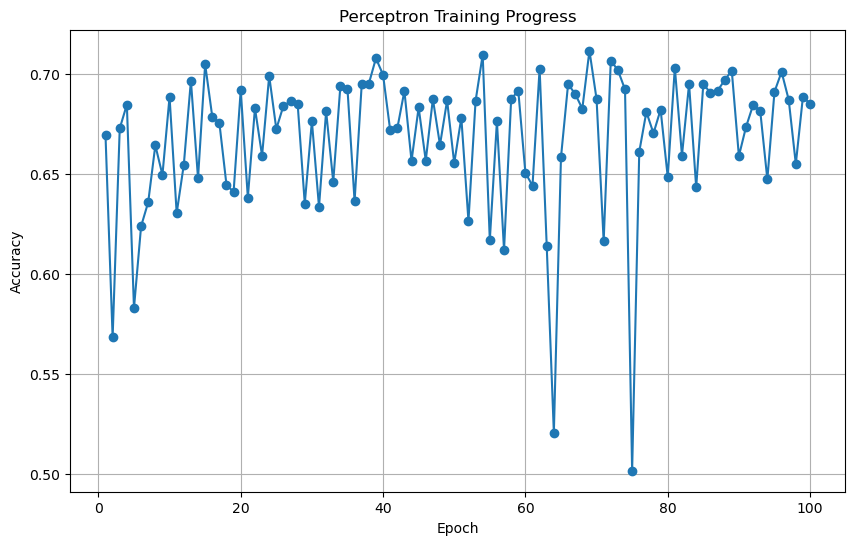

In [5]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


# Split Dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Initialize the Perceptron classifier
perceptron = Perceptron()

# Initialize Values
accuracies = []
epochs = []

# Trainning
max_epochs = 100
for epoch in range(max_epochs):
    perceptron.partial_fit(x_train, y_train, classes=np.unique(y_train))
    
    # Make predictions on the test data
    y_pred = perceptron.predict(x_test)

    # Calculate the accuracy of the model on the test data
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    epochs.append(epoch + 1)  # Add 1 to start counting from 1
    
# Print Accurancy
accurancy = accuracies[-1]
print(f"Accurancy after {max_epochs} epochs: {accurancy:.2f}")

# Print Training Process
plt.figure(figsize=(10, 6))
plt.plot(epochs, accuracies, marker='o', linestyle='-')
plt.title('Perceptron Training Progress')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


In [6]:
# Preparing Features for Prediction
x_predict = df.iloc[-1, :-1]
x_predict

gender                   1.0
age                     55.0
height(cm)             160.0
weight(kg)              65.0
waist(cm)               85.0
eyesight(left)           0.9
eyesight(right)          0.7
hearing(left)            1.0
hearing(right)           1.0
systolic               124.0
relaxation              75.0
fasting blood sugar     82.0
Cholesterol            213.0
triglyceride           142.0
HDL                     34.0
LDL                    150.0
hemoglobin              15.0
Urine protein            1.0
serum creatinine         0.8
AST                     26.0
ALT                     29.0
Gtp                     41.0
oral                     0.0
dental caries            0.0
tartar                   1.0
Name: 55691, dtype: float64

In [7]:
# Prediction
x_predict = x_predict.values.reshape(1, -1)
prediction = perceptron.predict(x_predict)
print(f"Predicted smoking status: {prediction[0]}")

Predicted smoking status: 1


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


In [8]:
# Printing Accurate Value to Predict
y_predicted = df.iloc[-1, -1]
print("Actual Smoking Status:", y_predicted)

Actual Smoking Status: 1


It can be seen how the prediction results generated after training our algorithm successfully determine the state of the target variable correctly. By implementing the Perceptron library from scikit-learn it is possible to apply this algorithm directly.

## IV.	Loss Function and Optimization Function Identification

In perceptron training, a loss function quantifies the error between the perceptron's predicted output and the target output. A common loss function used in perceptrons is the mean squared error (MSE). It's defined as:

Where:

$L = 1/2 Σ_i (t_i - o_i)^2$

Where:

$L$ = Loss (error) function

$t_i$ = Target Output for $i$-th training example.

$o_i$ = Peceptron's acutal Output for $i$-th training example.

The goal during training is to minimize this loss function by adjusting the perceptron's weights and bias.

The optimization function in perceptron training refers to the method used to minimize the loss. Gradient descent is commonly used. It calculates the gradient of the loss function with respect to the weights and bias, and updates them iteratively in the direction that reduces the loss. Stochastic gradient descent (SGD) and batch gradient descent are variations of this optimization technique. The learning rate ($η$) controls the step size during weight updates and is a critical hyperparameter to tune for convergence.

## V. Bibliography

Haykin, S. O. (2009). Neural Networks and Learning Machines (3rd edition). Pearson Education, 3rd edition, 2009. ISBN 978-0-13-147139-9.

Dataset extracted from: https://www.kaggle.com/datasets/kukuroo3/body-signal-of-smoking

Sklearn.linear_model.Perceptron. scikit. (n.d.). https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html 